In [2]:
# OLS from scratch using numpy 
import numpy as np

In [3]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [4]:
dataset.data.shape


(506, 13)

In [5]:
dataset.target.shape


(506,)

In [6]:
X = dataset.data
y = dataset.target[:,np.newaxis]

In [7]:
dataset.target.shape

(506,)

In [8]:
y.shape

(506, 1)

In [9]:
X.shape

(506, 13)

In [10]:
from matplotlib import pyplot as plt


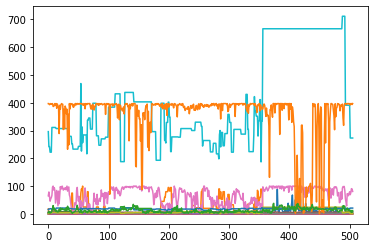

In [11]:
_ = plt.plot(X)

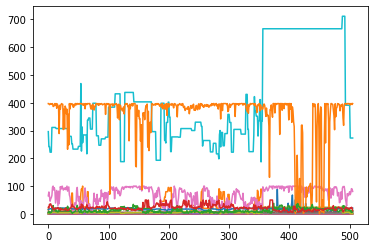

In [12]:
plt.plot(X)
plt.plot(y)

plt.show()

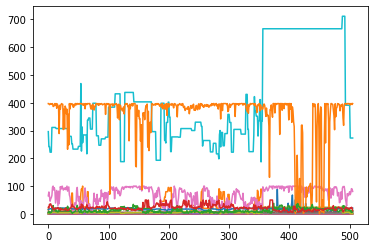

In [16]:
_ =plt.plot(df)

In [17]:
import pandas as pd
df = pd.DataFrame(X, columns = [i for i in 'abcdefghijklm'])
df['target'] = y

In [18]:
df.corr()

,a,b,c,d,e,f,g,h,i,j,k,l,m,target
a,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
b,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
c,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
d,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
e,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
f,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
g,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
h,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
i,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
j,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [59]:
df[['m','target']].corr()

,m,target
m,1.000000,-0.737663
target,-0.737663,1.000000


In [60]:
X = df['m'][:,np.newaxis]

In [61]:
y = df['target'][:,np.newaxis]

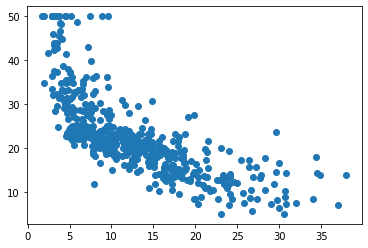

In [62]:
plt.scatter(X,y)


In [63]:
X.shape, y.shape

((506, 1), (506, 1))

# Linear regression with one variable 

In [64]:
# Mean squared error loss function 
def cost_func(X,y,weights):
    y_pred = np.dot(X,weights)
    n = len(y)
    cost = np.sum((y_pred - y)**2)/(2*n)
    return cost 

In [65]:
def gradient_descent(X,y,weights, learning_rate, iterations):
    n = len(y)
    cost_hist = np.zeros((iterations,1))
    
    for i in range(iterations):
        # weights = weights -  learning rate * d(cost)/d(weights) 
        # d(cost)/d(weights) = X(X*weights - y)/n ....do the calculations to check. 
        
        weights = weights - learning_rate * (X.T @ (X @ weights - y))/n
        cost_hist[i] = cost_func(X,y,weights)
        
    return cost_hist, weights 

In [66]:
#Normalising the values

n = len(y)
mean = np.mean(X,axis = 0 )
sigma = np.std(X,axis = 0)

X = (X-mean)/sigma

X.shape

(506, 1)

In [67]:
np.mean(X,axis = 0 ) 

array([-3.08931624e-16])

In [68]:
#Adding 1s coluimn so that the constant can also be counted in X 
X = np.hstack((np.ones((n,1)),X))

In [69]:
X.shape

(506, 2)

In [70]:
n_features = X.shape[1]

In [71]:
n_features

2

In [72]:
#You need to initialise weights to a random value. 
weights = np.zeros((n_features,1))
weights.shape

(2, 1)

In [73]:
#Actual function 

iterations = 1500
learning_rate = 0.01

initial_cost = cost_func(X,y,weights)
initial_cost

296.0734584980237

In [74]:
cost_hist , ideal_weights = gradient_descent(X,y,weights,learning_rate,iterations)
ideal_weights

array([[22.53279993],
       [-6.77765172]])

In [75]:
cost_hist

array([[290.5645022 ],
       [285.16517413],
       [279.87329269],
       ...,
       [ 19.24148361],
       [ 19.24148361],
       [ 19.24148361]])

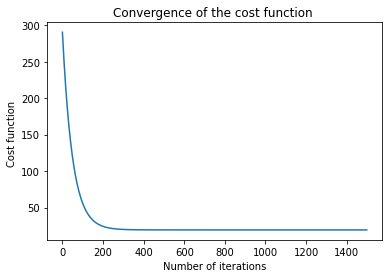

In [76]:

import matplotlib.pyplot as plt
plt.plot(range(len(cost_hist)) , cost_hist)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost function ")

plt.title("Convergence of the cost function ")
plt.show()

In [77]:
#Predicting the results 

y_pred = X @ ideal_weights

In [78]:
# Measuring accuracy or R2 of the test 
R2_linear = np.sum((y_pred - np.mean(y))**2)/np.sum((y - np.mean(y))**2)
R2_linear

0.5441459888863384

In [79]:
#Mean squared error : 
MSE_linear = cost_hist[-1]
MSE_linear

array([19.24148361])

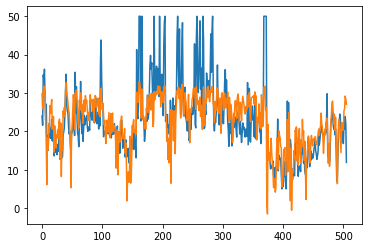

In [80]:
plt.plot(y)
plt.plot(y_pred)

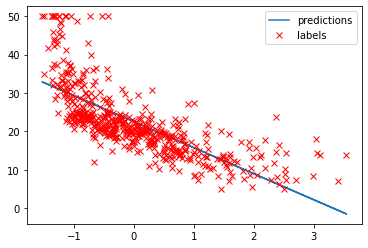

In [83]:
plt.plot(X[:, 1], y_pred, label='predictions')
plt.plot(X[:, 1], y, 'rx', label='labels')
plt.legend()

# Now performing Quadratic regression 

In [84]:
df['m2'] = df['m'] * df['m']
X = df['m'][:,np.newaxis]
y = df['target'][:,np.newaxis]

In [85]:
X2 = df['m2'][:,np.newaxis]

In [86]:
X = np.hstack((X,X2 ))

In [87]:
X

array([[ 4.98  , 24.8004],
       [ 9.14  , 83.5396],
       [ 4.03  , 16.2409],
       ...,
       [ 5.64  , 31.8096],
       [ 6.48  , 41.9904],
       [ 7.88  , 62.0944]])

In [88]:
#Normalising the values

n = len(y)
mean = np.mean(X,axis = 0 )
sigma = np.std(X,axis = 0)

X = (X-mean)/sigma

X.shape

(506, 2)

In [89]:
X = np.hstack((np.ones((n,1)),X))

In [90]:
X

array([[ 1.        , -1.0755623 , -0.78952949],
       [ 1.        , -0.49243937, -0.54045362],
       [ 1.        , -1.2087274 , -0.82582493],
       ...,
       [ 1.        , -0.98304761, -0.7598079 ],
       [ 1.        , -0.86530163, -0.71663755],
       [ 1.        , -0.66905833, -0.63138918]])

In [91]:
#You need to initialise weights to a random value. 
weights = np.zeros((X.shape[1],1))
weights.shape

(3, 1)

In [92]:
#Actual function 

iterations = 1500
learning_rate = 0.01

initial_cost = cost_func(X,y,weights)
initial_cost


296.0734584980237

In [93]:
cost_hist , ideal_weights = gradient_descent(X,y,weights,learning_rate,iterations)
ideal_weights

array([[22.53279993],
       [-9.19472072],
       [ 2.82197061]])

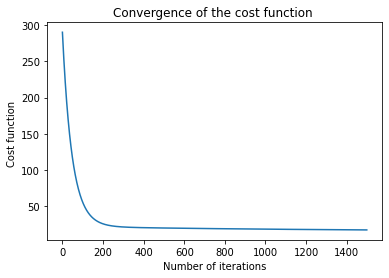

In [94]:

import matplotlib.pyplot as plt
plt.plot(range(len(cost_hist)) , cost_hist)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost function ")

plt.title("Convergence of the cost function ")
plt.savefig("Convergence of Cost Function")
plt.show()

In [95]:
cost_hist

array([[290.24306439],
       [284.54321589],
       [278.97074724],
       ...,
       [ 17.3556385 ],
       [ 17.35391162],
       [ 17.35218611]])

In [96]:
#Predicting the results 

y_pred = X @ ideal_weights
# Measuring accuracy or R2 of the test 
R2_quad = np.sum((y_pred - np.mean(y))**2)/np.sum((y - np.mean(y))**2)
R2_quad


0.5053095441967927

In [97]:
#Mean squared error : 
MSE_quad = cost_hist[-1]
MSE_quad


array([17.35218611])

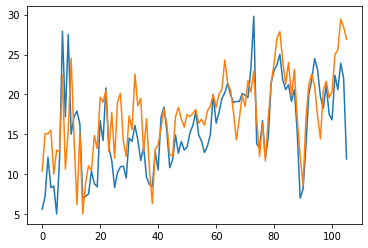

In [98]:
plt.plot(y[400:])
plt.plot(y_pred[400:])

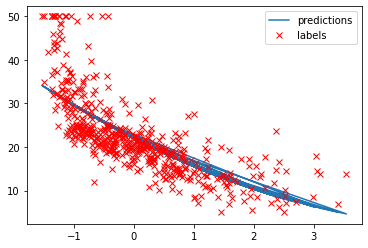

In [101]:
plt.plot(X[:, 1], y_pred, label='predictions')
plt.plot(X[:, 1], y, 'rx', label='labels')
plt.legend()